In [6]:
!pip install Keras-Preprocessing


     -------------------------------------- 42.6/42.6 kB 294.0 kB/s eta 0:00:00


In [7]:
import numpy as np
from keras import models, layers, optimizers
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn import preprocessing
# Load the data
df=pd.read_csv("IMDB Dataset.csv")



In [8]:
train_df = df.sample(frac=0.8, random_state=25)
test_df = df.drop(train_df.index)


In [9]:
print(train_df)

                                                  review sentiment
13920  Kudos to Fawcett to taking on roles that, at t...  positive
23439  If you are a fan of early Duke movies, this Lo...  positive
11851  I'd love to give this movie a 10/10, but in it...  positive
8278   The credits at the end read "ALL directed by S...  negative
31258  This young filmmaker has a talent for capturin...  positive
...                                                  ...       ...
38608  I just got back from a screening a couple of h...  positive
48009  OK, I don't want to upset anyone who enjoyed t...  negative
9184   i just watched the movie i was afraid it's gon...  positive
49448  There are few films that leave me with the fee...  positive
11381  I watched this movie with my boyfriend, an avi...  negative

[40000 rows x 2 columns]


In [10]:
print(test_df)

                                                  review sentiment
20     After the success of Die Hard and it's sequels...  positive
22     What an absolutely stunning movie, if you have...  positive
28     This movie was so frustrating. Everything seem...  negative
32     My first exposure to the Templarios & not a go...  negative
49     Average (and surprisingly tame) Fulci giallo w...  negative
...                                                  ...       ...
49981  And I repeat, please do not see this movie! Th...  negative
49986  This movie is a disgrace to the Major League F...  negative
49989  I got this one a few weeks ago and love it! It...  positive
49994  This is your typical junk comedy.<br /><br />T...  negative
49998  I'm going to have to disagree with the previou...  negative

[10000 rows x 2 columns]


In [11]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=10000) 
tokenizer.fit_on_texts(train_df['review'].tolist())

# Convert the text data to sequences of integers
train_sequences = tokenizer.texts_to_sequences(train_df['review'].tolist())
test_sequences = tokenizer.texts_to_sequences(test_df['review'].tolist())

# Pad the sequences to a fixed length
max_length = 100
train_data = pad_sequences(train_sequences, maxlen=max_length)
test_data = pad_sequences(test_sequences, maxlen=max_length)

# Convert the labels to categorical
label_encoder = preprocessing.LabelEncoder()
train_labels= label_encoder.fit_transform(train_df['sentiment'])
#train_labels = to_categorical(train_df['sentiment'])


In [12]:
model = models.Sequential()
model.add(layers.Embedding(10000, 64, input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [13]:
 model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1000/1000 [==============================] - 21s 19ms/step - loss: 0.4237 - accuracy: 0.7939 - val_loss: 0.3224 - val_accuracy: 0.8584
Epoch 2/10
1000/1000 [==============================] - 19s 19ms/step - loss: 0.1613 - accuracy: 0.9411 - val_loss: 0.4170 - val_accuracy: 0.8445
Epoch 3/10
1000/1000 [==============================] - 19s 19ms/step - loss: 0.0308 - accuracy: 0.9921 - val_loss: 0.6161 - val_accuracy: 0.8416
Epoch 4/10
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0074 - accuracy: 0.9983 - val_loss: 0.7791 - val_accuracy: 0.8396
Epoch 5/10
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.9080 - val_accuracy: 0.8410
Epoch 6/10
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.9476 - val_accuracy: 0.8326
Epoch 7/10
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0129 - accuracy: 0.9957 - val_loss: 1.0079 -

In [9]:
test_labels= label_encoder.fit_transform(test_df['sentiment'])
print(test_labels[2])
#test_labels = to_categorical(test_df['sentiment'])
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)


0
313/313 [==============================] - 1s 2ms/step - loss: 1.2979 - accuracy: 0.8369
Test accuracy: 0.836899995803833


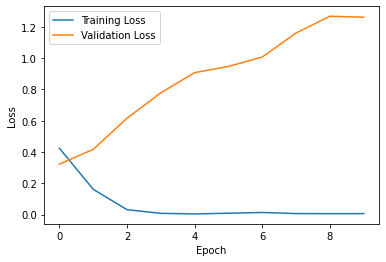

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


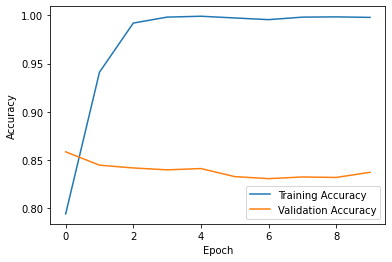

In [16]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
predictions = model.predict(test_data)

313/313 [==============================] - 1s 3ms/step


In [18]:
text = tokenizer.sequences_to_texts(test_data)

In [19]:
pred = np.zeros(len(predictions))
for i, score in enumerate(predictions):
    pred[i] = np.round(score)
    
predicted_sentiments = ['positive' if label == 1 else 'negative' for label in pred]    

In [20]:
print(f"Review text: {text[4]}\n")
print(f"Review : {predicted_sentiments[4]}")


Review text: average and surprisingly tame fulci giallo which means it's still quite bad by normal standards but by its solid build up and some nice touches such as a neat time twist on the issues of visions and br br the well known weaknesses are in full gear banal dialogue wooden acting illogical plot points and the finale goes on much too long while the denouement proves to be a rather lame or shall i say limp affair br br fulci's ironic handling of giallo is amusing though yellow clues wherever you look br br 3 out of 10 killers

Review : positive
